<a href="https://colab.research.google.com/github/mrartis1/MA-MachineLearning/blob/main/DNN2test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
traindata = pd.read_csv('/content/drive/MyDrive/Colab Results/Data/Training.csv', header=None)
testdata = pd.read_csv('/content/drive/MyDrive/Colab Results/Data/Testing.csv', header=None)

In [5]:
X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_test = np.array(C)

X_train = np.array(trainX)
X_test = np.array(testT)


batch_size = 64

In [6]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn2layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn2layer/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, epochs=100, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn2layer/dnn2layer_model.hdf5")


Epoch 1/100
7718/7720 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9957
Epoch 00001: loss improved from inf to 0.01304, saving model to kddresults/dnn2layer/checkpoint-01.hdf5
7720/7720 [==============================] - 38s 5ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 2/100
7719/7720 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9979
Epoch 00002: loss improved from 0.01304 to 0.00705, saving model to kddresults/dnn2layer/checkpoint-02.hdf5
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 3/100
7719/7720 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981
Epoch 00003: loss improved from 0.00705 to 0.00610, saving model to kddresults/dnn2layer/checkpoint-03.hdf5
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 4/100
7719/7720 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983
Epoch 00

In [ ]:
from sklearn.metrics import confusion_matrix
import os
for file in os.listdir("/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/"):
  if not file.endswith(".hdf5"):
        print(os.path.join("/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/", file))

/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/training_set_dnnanalysis.csv


In [7]:
score = []
name = []
from sklearn.metrics import confusion_matrix
import os
for file in os.listdir("/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/"):
  if file.endswith(".hdf5"):
    model.load_weights("/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/"+file)
    y_train1 = y_test
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_train1, y_pred)
    recall = recall_score(y_train1, y_pred , average="binary")
    precision = precision_score(y_train1, y_pred , average="binary")
    f1 = f1_score(y_train1, y_pred, average="binary")
    print("----------------------------------------------")
    print("accuracy")
    print("%.3f" %accuracy)
    print("recall")
    print("%.3f" %recall)
    print("precision")
    print("%.3f" %precision)
    print("f1score")
    print("%.3f" %f1)
    score.append(accuracy)
    name.append(file)

----------------------------------------------
accuracy
0.921
recall
0.906
precision
0.996
f1score
0.949
----------------------------------------------
accuracy
0.923
recall
0.906
precision
0.999
f1score
0.950
----------------------------------------------
accuracy
0.922
recall
0.907
precision
0.996
f1score
0.949
----------------------------------------------
accuracy
0.924
recall
0.907
precision
0.999
f1score
0.951
----------------------------------------------
accuracy
0.925
recall
0.908
precision
0.998
f1score
0.951
----------------------------------------------
accuracy
0.925
recall
0.908
precision
0.999
f1score
0.951
----------------------------------------------
accuracy
0.926
recall
0.909
precision
0.999
f1score
0.952
----------------------------------------------
accuracy
0.925
recall
0.908
precision
0.998
f1score
0.951
----------------------------------------------
accuracy
0.926
recall
0.909
precision
0.999
f1score
0.952
----------------------------------------------
accuracy

In [8]:
print(type(name))
print(type(score))

print(name[0])

<class 'list'>
<class 'list'>
checkpoint-01.hdf5


In [ ]:
output=model.predict(X_test)

In [ ]:
dir(output)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [ ]:
type(output)

numpy.ndarray

In [ ]:
output

array([[6.5960718e-23],
       [6.5960718e-23],
       [6.5960718e-23],
       ...,
       [1.9806220e-22],
       [2.6731107e-21],
       [1.9806220e-22]], dtype=float32)

In [ ]:
output.shape

(311029, 1)

In [ ]:
np.histogram(output)

(array([ 80175,    210,    221,    148,    133,    278,    358,    267,
          1124, 228115]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

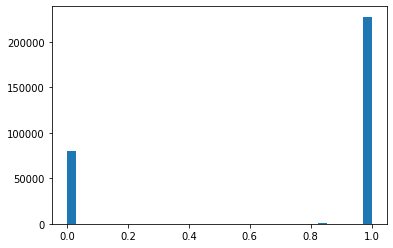

In [ ]:
import matplotlib.pyplot as plt
plt.hist(output, bins='auto')
np.savetxt("/content/drive/MyDrive/Colab Results/dnnres/dnn2predicted.txt", output)


In [9]:
model.load_weights("/content/drive/MyDrive/Colab Results/kddresults/dnn2layer/"+name[score.index(max(score))])
pred = (model.predict(X_test) > 0.5).astype("int32")
#proba = model.predict_proba(X_test)
np.savetxt("/content/drive/MyDrive/Colab Results/dnnres/dnn2predicted.txt", pred)
#np.savetxt("/content/drive/MyDrive/Colab Results/dnnres/dnn2probability.txt", proba)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred , average="binary")
precision = precision_score(y_test, pred , average="binary")
f1 = f1_score(y_test, pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)
print(model.summary())

----------------------------------------------
accuracy
0.932
precision
0.998
recall
0.917
f1score
0.956
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              43008     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               787200    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 769       
                                                                 
 activation (Activation)     (None, 1)                 0         
                 